In [1]:
"""Displays the current working directory path for the notebook environment. This shell command returns the absolute path to show where code and files are being executed from. Useful for verifying file locations and debugging path-related issues. Similar to using os.getcwd() in Python but using shell command syntax.
"""
!pwd

/N/u/admello/BigRed200


# **Spacy Model - Innovation Feature**

In [3]:
"""Changes the current working directory to the Colab Notebooks folder in Google Drive. This directory navigation is necessary to access and work with files stored in the user's Google Drive. This command is typically run at the start of a Colab notebook to ensure proper file access. The previous pwd command would have shown the initial directory before this change.
"""
# cd /content/drive/MyDrive/Colab Notebooks

"Changes the current working directory to the Colab Notebooks folder in Google Drive. This directory navigation is necessary to access and work with files stored in the user's Google Drive. This command is typically run at the start of a Colab notebook to ensure proper file access. The previous pwd command would have shown the initial directory before this change.\n"

In [6]:
# xlr8 module
#!git clone https://github.com/Ethereal-AI/xlr8.git

Cloning into 'xlr8'...
remote: Enumerating objects: 283, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 283 (delta 176), reused 244 (delta 143), pack-reused 0 (from 0)
Receiving objects: 100% (283/283), 55.04 KiB | 2.12 MiB/s, done.
Resolving deltas: 100% (176/176), done.


In [19]:
# %cd xlr8
# !pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///geode2/home/u010/amoamin/BigRed200/990_training/feature_creation/spacy/xlr8
  Preparing metadata (setup.py) ... done
  DEPRECATION: Legacy editable install of xlr8==0.0.1 from file:///geode2/home/u010/amoamin/BigRed200/990_training/feature_creation/spacy/xlr8 (setup.py develop) is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for xlr8


In [3]:
"""This code prints the path to the Python executable being used in the current environment. It imports the sys module and uses sys.executable to display the full file system location of the Python interpreter. This information is useful for verifying which Python installation is active, especially when working in Colab environments or virtual environments. The code follows directory navigation commands and helps confirm the Python environment setup before proceeding with Spacy model implementation for innovation feature analysis.
"""
import sys
print(sys.executable)



/N/soft/sles15/python/gnu/3.12.4/bin/python3


In [1]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install scikit-learn-intelex
!pip install faiss-cpu
!pip install faiss-gpu
!pip install swifter


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu
Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install spacy


Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip show xlr8

Name: xlr8
Version: 0.0.1
Summary: Fast cosine similarity for Python
Home-page: https://github.com/Ethereal-AI/xlr8
Author: Ethereal AI
Author-email: 
License: 
Location: /geode2/home/u010/admello/BigRed200/xlr8
Editable project location: /geode2/home/u010/admello/BigRed200/xlr8
Requires: numpy, scikit-learn, scipy
Required-by: 


In [8]:
# import xlr8.xlr8 as xlr8
print(dir(xlr8))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'linalg', 'similarity', 'truncated_svd']


In [6]:
"""This code cell sets up the required libraries and tools for advanced NLP processing and machine learning tasks. It imports essential packages for data manipulation (pandas, numpy), machine learning (sklearn), text processing (spacy, nltk), and performance optimization (faiss, swifter). The cell initializes the large English spacy model (en_core_web_lg) with GPU preference and configures performance decorators for caching and timing. Notable components include tools for clustering (KMeans), text vectorization (CountVectorizer), and similarity calculations (cosine_similarity). This setup follows system path verification from previous cells and prepares the environment for text-based innovation feature analysis. Warning messages are suppressed for cleaner output.
"""
from tqdm import tqdm
import faiss
import swifter
import nltk
from nltk.corpus import stopwords
from sklearnex import patch_sklearn
patch_sklearn()
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
#from sklearn.metrics.pairwise import cosine_similarity
import xlr8
from xlr8.similarity import cosine_similarity
import datetime
import spacy
spacy.cli.download("en_core_web_lg")
spacy.prefer_gpu()
nlp = spacy.load('en_core_web_lg')

import joblib, pickle, json, re
#import decorators
from custom_decorators import memoize, timing_decorator #module available in one drive
from functools import lru_cache

import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('stopwords')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 188.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to
[nltk_data]     /N/u/admello/BigRed200/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
"""This code block sets up essential file paths and data structures for processing Form 990 tax return data 
with a focus on innovation analysis. It defines the input ZIP file and CSV filename, specifies relevant columns to extract from the Form 990 data (including business names and mission statements), initializes English stopwords for text processing, and loads a custom CSV file containing innovation-related keywords. This setup builds on the previously imported libraries and NLP tools, particularly spaCy, and prepares for subsequent text analysis and feature extraction operations. The code acts as a configuration step before the main data processing pipeline.
"""
zip_file_path = "2019_990_All Form 990 Filers.zip"
filename = "Feature_Creation_Base_990PF.csv"
# filename = r"/content/drive/MyDrive/P990/2019_990_All Form 990 Filers (compiled from 2020-2021 IRS File Extractions) w Text Vars and NTEE codes (2,130 missing) (N = 269,217)_2023.2.14.csv" #change this


# A list of column names to use from the CSV file
# cols = ['business_name',
#                          'mission_partI',
#                          'mission_partIII',
#                          'Dsc',
#                          'sched_o_FrmAndLnRfrncDsc_grouped',
#                          'sched_o_ExplntnTxt_grouped'
#                         ]
cols = ["text_ascii"]
#A set of stopwords to use when processing text data.
stops = set(stopwords.words('english'))

#The path to the CSV file containing International keywords and synonyms
kw_invention=pd.read_csv("Invention_Keywords.csv")




In [15]:
form990s = pd.read_csv("Feature_Creation_Base_990PF.csv")
#form990s=form990s.head(2000)
print(form990s[:500])
print(f'Length of the input dataframe: {len(form990s)}')
print('[INFO] -> Form 990 File read as a dataframe... ')
print()

              org_ID    org_EIN  \
0    471714999_34748  471714999   
1    526854620_19010  526854620   
2    136106436_07078  136106436   
3    465646185_33018  465646185   
4    066028722_02901   66028722   
..               ...        ...   
495  223790896_10036  223790896   
496  476518370_45209  476518370   
497  527238834_14202  527238834   
498  046078603_15230   46078603   
499  046054298_02339   46054298   

                                          org_name_fix org_type  \
0                           Hope Global Foundation Inc        F   
1                            Victory Foundation 042165        F   
2                             Howard S Bunn Foundation        F   
3                         Lba Community Foundation Inc        F   
4                     Kent Sidney A Tr For Kent Librar        F   
..                                                 ...      ...   
495            Hugh And Anny K Godsey Scholarship Fund        F   
496        Mary Isabelle Mccorry Char Trust

In [16]:
form990s.shape

(132665, 7)

## **Preprocessing of input dataset(Mission statements)**

In [17]:
def read_data(zip_file_path, filename):
    """
    Read Dataset and perform necessary pre-processing steps.
    """
    # with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    # # Open the CSV file within the ZIP
    #     with zip_file.open(filename) as csv_file:
    #         # Read the CSV file into a pandas DataFrame
    #         form990s = pd.read_csv(csv_file, 
    #                                parse_dates=['return_created'], 
    #                                usecols=cols + ['return_created', 'ein'])
    
    form990s = pd.read_csv(filename,  
                                   usecols=cols + ['org_EIN'])
#                                    nrows=num_rows)
    # Read the CSV file with the specified number of rows    

    """
    # Data Pre-processing
    ## FORM990 PRE-PROCESSING
    **Merge all the textual information present by each EIN (keep the latest one only by looking at return_created).
    Before Merging, some preprocessing is done like Punctuation removal, stopword removal and lemmatization of words. Finally we get lemmatized keywords per organization.**
    """
    #Remove duplicate ein entries by keeping only latest form990 submission
    #dup_ein = form990s.sort_values('return_created').duplicated('ein', keep='last')
    #form990s = form990s[~dup_ein]
    #replace the index with ein
    form990s.index = form990s.org_EIN
    form990s.drop(['org_EIN'], axis=1, inplace=True)
    #Fill null values and convert all the column data type to string
    form990s = form990s.fillna('')
    form990s = form990s.astype('string')
    return form990s


form990s = read_data(zip_file_path, filename)
print(form990s[:10])
print(f'Length of the input dataframe: {len(form990s)}')
print('[INFO] -> Form 990 File read as a dataframe... ')
print()

                                                  text_ascii
org_EIN                                                     
471714999  Hope Global Foundation Inc||| <> /// <> To Fig...
526854620            Victory Foundation 042165||| <> /// <> 
136106436             Howard S Bunn Foundation||| <> /// <> 
465646185         Lba Community Foundation Inc||| <> /// <> 
66028722      Kent Sidney A Tr For Kent Librar||| <> /// <> 
956006859  The Samuel Goldwyn Foundation||| <> /// Giving...
841790324  Covered In Love Preschool Inc||| <> /// <> <> ...
136074485     Uw Strong - Ny Presbyterian Hosp||| <> /// <> 
43836200           The Young Family Foundation||| <> /// <> 
10791880       The Alvin Marley Foundation Inc||| <> /// <> 
Length of the input dataframe: 132665
[INFO] -> Form 990 File read as a dataframe... 



In [18]:
pattern = re.compile(r'[^A-Za-z0-9\s]*')
@memoize
def remove_punc_stop(text):
        # This function is utilized only in clean_df_text()
        """
        Removes punctuation and stop words then lemmatizes a string of text.
        :param text: The string of text to be processed.
        :type text: str
        :return: A string containing the processed text.
        :rtype: str
        """
        # Keep only alphanumeric tokens
        text = text.replace('-', ' ')
        text = text.replace('_', ' ')
        text = text.replace(',', ' ')
        text = text.replace('\.', ' ')
        # text = re.sub(r'[^A-Za-z0-9\s]*', '', text) #Remove non-alphanumeric chars and spaces
        text = re.sub(pattern, '', text)  # Remove non-alphanumeric chars and spaces
        # Remove stop words
        token_list = [token for token in text.split(' ') if token not in stops]
        text_string = ' '.join(token_list)
        # Lemmatize each word
        doc = nlp(text_string)
        lemmas = [token.lemma_ for token in doc]
        lemma_string = ' '.join(lemmas)
        return lemma_string

@timing_decorator
def clean_df_text(df):
        # This function is utilized only in load_form990s()
        """
        Cleans and processes the text data in a DataFrame.
        :param df: The DataFrame containing the text data to be cleaned and processed.
        :type df: pd.DataFrame
        :return: A Series containing the cleaned and processed text data.
        :rtype: pd.Series
        """
        # Select only text columns
        txtcols = cols
        # Merge all the text fields into one column
        df = df[txtcols].agg(' '.join, axis=1)

        # Make all text lower case
        df = df.str.lower()
        # keep only alphanumeric tokens, remove stop words and lemmatize
        # df = df.apply(remove_punc_stop)
        df = df.swifter.apply(remove_punc_stop)  # using swifter-> vectorization or parrelization whichever is efficient, 20% faster for 20k rows

        return df

form990s = clean_df_text(form990s)
print("[INFO] -> Cleaning of the input dataframe is done....")
print()

# #Save the final form
with open('form990txt_20k.pkl', 'wb') as f:
     pickle.dump(form990s, f)

# Create the form990s DataFrame
form990s = pd.DataFrame(form990s)
form990s.to_csv('form990s_processed_df.csv')

Pandas Apply:   0%|          | 0/132665 [00:00<?, ?it/s]

Function clean_df_text took 1277.3183686733246 seconds to run.
[INFO] -> Cleaning of the input dataframe is done....



In [19]:
"""Loads the previously processed and saved Form 990 dataset from CSV file into a pandas DataFrame. This DataFrame contains cleaned and preprocessed mission statements from nonprofit organizations, where text has been lemmatized, punctuation removed, and stop words filtered. This step retrieves the results of the extensive preprocessing done in previous cells, making the data ready for further analysis of innovation-related features. The DataFrame index corresponds to organization EINs and contains merged text from multiple Form 990 fields.
"""
form990s = pd.read_csv('form990s_processed_df.csv')

In [20]:
"""Displays the processed Form 990 DataFrame containing cleaned and lemmatized mission statement text from nonprofit organizations. This DataFrame was created in the previous cell through text preprocessing steps including punctuation removal, stopword removal, and lemmatization. The DataFrame's rows are indexed by EIN (Employer Identification Number) and contains the merged, processed text from multiple form fields like mission statements and descriptions. This is a key intermediate output that will be used for further analysis of innovation-related content in nonprofit missions.
"""
form990s

,org_EIN,0
0,471714999,hope global foundation inc fight hunger po...
1,526854620,victory foundation 042165
2,136106436,howard bunn foundation
3,465646185,lba community foundation inc
4,66028722,kent sidney tr kent librar
...,...,...
132660,256018977,painter r mckeesport hosp mission provide qual...
132661,752528901,lockheed martin employee charity fund fund ...
132662,436882508,william f mary louise wischmeyer family founda...
132663,871759737,bend fence foundation bend fence foundation de...


In [21]:
"""This code block performs data preprocessing on the form990s DataFrame by setting the EIN (Employer Identification Number) as the index, removing the original EIN column, handling missing values by filling them with empty strings, and converting all columns to string data type. This step ensures consistent data format for subsequent text analysis operations and follows the initial data loading and cleaning steps from previous cells. The expected output is a cleaned DataFrame with EIN as index and standardized string values.
"""
#change the index to EIN values
form990s.index=form990s.org_EIN
form990s.drop(['org_EIN'], axis=1, inplace=True)
#form990s.drop(['ein'], axis=1, inplace=True)
form990s = form990s.fillna('')
form990s = form990s.astype('string')
form990s

,0
org_EIN,
471714999,hope global foundation inc fight hunger po...
526854620,victory foundation 042165
136106436,howard bunn foundation
465646185,lba community foundation inc
66028722,kent sidney tr kent librar
...,...
256018977,painter r mckeesport hosp mission provide qual...
752528901,lockheed martin employee charity fund fund ...
436882508,william f mary louise wischmeyer family founda...


## **Preprocessing of Invention keywords**

In [22]:
"""This code block performs two main data processing tasks:
1. Converts the form990s DataFrame into a pandas Series by selecting the first column if needed, ensuring consistent data format for further processing
2. Loads and cleans innovation-related keywords from a CSV file by:
   - Removing extra spaces and special characters
   - Standardizing apostrophe formatting
   - Converting the processed keywords into a list
The code prepares both the mission statement data and innovation keywords for subsequent text analysis and matching operations. This step builds on the previous data preprocessing of Form 990 statements and sets up the keyword dictionary needed for innovation feature detection.
"""
# If form990s is already a Series, no need to access a specific column
if isinstance(form990s, pd.DataFrame):
    form990s = form990s.iloc[:, 0]  # Convert to Series by selecting the first column

print(type(form990s))

# Load international keywords from a file
keywords = pd.read_csv('Invention_Keywords.csv', encoding='utf-8', header=None).iloc[:, 0]
# Perform string processing on keywords
keywords = keywords.str.strip()  # Remove leading and trailing spaces
keywords = keywords.str.replace("[^A-Za-z0-9\s']", "", regex=True)  # Remove non-alphanumeric or space characters
keywords = keywords.str.replace(r"\s'\s", "'", regex=True)  # Remove spaces around apostrophes
keywords = keywords.str.replace(r"\s{2,}", " ", regex=True)  # Remove double or more spaces
keywords = keywords.tolist()  # Convert to list

print('--Invention keywords--')
print(keywords)

<class 'pandas.core.series.Series'>
--Invention keywords--
['KeywordPhrase', 'Academic innovation', 'Academic research', 'Advanced algorithm', 'Aerospace engineering', 'Aesthetics', 'Agricultural economics', 'Agricultural environmental engineering', 'Agricultural information engineering', 'Agricultural structure', 'Algorithm development', 'Analytical chemistry', 'Anatomical structure', 'Anatomy', 'Anesthesiology', 'Animal life science', 'Animal physiological chemistry', 'Animal production science', 'Applied anthropology', 'Applied biochemistry', 'Applied condensed matter physics', 'Applied mathematics', 'Applied microbiology', 'Applied molecular biology', 'Applied physical properties', 'Applied plasma science', 'Applied research', 'Aquatic bioproduction science', 'Aquatic life science', 'Archaeology', 'Architectural environment equipment', 'Architectural history', 'Architectural planning', 'Area studies', 'art studies', 'Artificial intelligence', 'Astronomy', 'Atmospheric sciences', 'A

## **Vetorizing mission statements**

In [23]:
def classify_english_terms(keyword):
    """
    Classifies a keyword using a spaCy model.
    :param keyword: The keyword to be classified.
    :type keyword: str
    :return: A boolean indicating whether the spaCy model's vector for the keyword is non-zero.
    :rtype: bool
    """
    spacy_doc = nlp(keyword)
    return spacy_doc.vector.any()
kw_is_english_list = []
for keyword in keywords:
    kw_is_english = classify_english_terms(keyword)
    kw_is_english_list.append(bool(kw_is_english))
english_kws = pd.Series(keywords)[pd.Series(kw_is_english_list)].tolist()
nonenglish_kws = pd.Series(keywords)[~pd.Series(kw_is_english_list)].tolist()
english_lemmas = []
for kw in english_kws:
    doc = nlp(kw)
    temp_lemmas = []
    for token in doc:
        temp_lemmas.append(token.lemma_)
    lemmas = ' '.join(temp_lemmas)
    english_lemmas.append(lemmas)
kw_dict = {}
kw_dict['english_lemmas'] = english_lemmas
kw_dict['nonenglish'] = nonenglish_kws
nonenglish_kws = kw_dict['nonenglish']
cv = CountVectorizer(ngram_range=(1, 3))
cv.fit(np.array(nonenglish_kws))

def transform_english(X):
    """
    Vectorize English text data using semantic similarity.
    :param X: The Series containing the English text data to be transformed.
    :type X: pd.Series
    :return: A DataFrame containing the transformed text data.
    :rtype: pd.DataFrame
    """
    eng_kws = kw_dict['english_lemmas']
    num_kws = len(eng_kws)
    eng_vecs = np.zeros((num_kws, 300))
    for (i, kw) in enumerate(eng_kws):
        eng_vecs[i] = nlp(kw).vector

    def calc_sim_score(text, num_scores=5):
        doc = nlp(text)
        num_tokens = doc.__len__()
        doc_vecs = np.zeros((num_tokens, 300))
        for (i, token) in enumerate(doc):
            doc_vector = token.vector
            doc_vecs[i] = doc_vector
        sim_scores = cosine_similarity(doc_vecs, eng_vecs)
        sim_score_sort_order = sim_scores.argsort(0)[-num_scores:][::-1]
        sim_scores = np.take_along_axis(sim_scores, sim_score_sort_order, axis=0)
        sim_scores = sim_scores.T.reshape(1, -1)
        return sim_scores
    tqdm_pandas = tqdm.pandas()
    X = X.progress_apply(calc_sim_score)

    def reshape(X):
        """Reshapes a numpy array into a 1-dimensional array.
Parameters:
    X (numpy.ndarray): Input array of any shape.
Returns:
    numpy.ndarray: Flattened 1-dimensional array containing all elements from the input array.
"""
        X = np.reshape(X, newshape=-1)
        return X
    X = X.apply(reshape)
    idx = X.index
    X = X.values.tolist()
    X = pd.DataFrame(X, index=idx)
    return X
func_transform = FunctionTransformer(transform_english)
transformers = [('english_sim', func_transform), ('nonenglish_vec', cv)]
feat_union = FeatureUnion(transformers, n_jobs=1)
vec_df = feat_union.transform(form990s)
with open('vec_df.pkl', 'wb') as f:
    pickle.dump(vec_df, f)
print('vec_df loaded')
print(vec_df)

100%|███████████████████████████████████| 132665/132665 [26:14<00:00, 84.24it/s]


vec_df loaded
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 271296071 stored elements and shape (132665, 2137)>
  Coords	Values
  (0, 0)	0.5230122644687174
  (0, 1)	0.4766251899108872
  (0, 2)	0.3722826221611723
  (0, 3)	0.35722948014866784
  (0, 4)	0.318910930711665
  (0, 5)	0.4544050948467299
  (0, 6)	0.44281991559825007
  (0, 7)	0.3312994982162008
  (0, 8)	0.3213888385198044
  (0, 9)	0.31754651720229365
  (0, 10)	0.3381900070929053
  (0, 11)	0.2768159909410462
  (0, 12)	0.20749453343210983
  (0, 13)	0.19727099521223773
  (0, 14)	0.16497668683762712
  (0, 15)	0.41400484508319063
  (0, 16)	0.32824961422031074
  (0, 17)	0.29404874740210935
  (0, 18)	0.20698766739766813
  (0, 19)	0.17510113782970113
  (0, 20)	0.3384889632191432
  (0, 21)	0.31870841924298815
  (0, 22)	0.20959900183692778
  (0, 23)	0.20697276911241386
  (0, 24)	0.20593854270229994
  :	:
  (132664, 2095)	0.21898020078946945
  (132664, 2096)	0.21898020078946945
  (132664, 2097)	0.21676969003058175
  (132664,

In [24]:
"""Converts the form990s Series (containing preprocessed mission statement text) into a DataFrame format. 
This step is necessary for further data manipulation and analysis of the nonprofit organizations' mission statements. This transformation maintains the same data but changes its structure to work with DataFrame operations in subsequent cells.
"""
form990s=pd.DataFrame(form990s)

## **K-Means clustering(Mission statements)**

In [25]:
"""This code performs K-means clustering on preprocessed mission statement vectors using FAISS (Facebook AI Similarity Search) library. It processes a dense matrix of vectorized mission statements (vec_df_dense) and tests different cluster configurations from 20 to 32 clusters. For each cluster size, it creates a pipeline with StandardScaler and FAISS K-means, trains the model using GPU acceleration, and stores cluster assignments in both a dictionary and the form990s DataFrame. The code depends on previously vectorized mission statements and preprocessed form990s data. The final results are saved to a CSV file, allowing for analysis of how nonprofits cluster based on their mission statement similarities in terms of innovation-related keywords.
"""

# Assuming vec_df is currently a CSR matrix
vec_df_dense = vec_df.toarray().astype(np.float32)

vec_df_dense = np.nan_to_num(vec_df_dense,nan=0.0,posinf=0.0,neginf=0.0)
## COLAB SECTION STARTS
# Dictionary to store cluster results and NTEE distribution for different cluster configurations
cluster_results = {}
cluster_props = {}
# Define the range of cluster numbers
cluster_range = range(20, 32)
np.random.seed(42)

# Iterate over the cluster numbers and compute the silhouette scores with tqdm
for num_clusters in cluster_range:
    # Create the pipeline with StandardScaler and KMeans clustering using faiss
    kmeans = faiss.Kmeans(d=vec_df_dense.shape[1], k=num_clusters, niter=300, nredo=10, gpu=True)
    pipeline = make_pipeline(StandardScaler(), kmeans)

    # Train the KMeans directly with faiss on the data
    kmeans.train(vec_df_dense)


    # Predict cluster assignments for the data
    kmeans_labels = kmeans.index.search(vec_df_dense.astype(np.float32), 1)[1]

    # Store the cluster assignments
    cluster_results[num_clusters] = kmeans_labels.flatten()

    # Add cluster assignments to the existing form990s DataFrame
    form990s[f'cluster_{num_clusters}'] = kmeans_labels.flatten()
print('[INFO] -> Clustering Complete ....')
print()


#form990s.to_pickle('form990_final.pkl')
form990s.to_csv('form990_final.csv')



[INFO] -> Clustering Complete ....



## **Finding optimal k- value**

In [27]:
"""This code cell implements the elbow method to find the optimal number of clusters for K-means clustering. It iterates through a range of cluster numbers (20-32) and calculates the Within-Cluster Sum of Squares (WCSS) for each configuration. The code uses FAISS for GPU-accelerated K-means clustering on the vectorized mission statements data (vec_df_dense). For each iteration, it trains a K-means model with 300 iterations and 10 restarts, then computes the WCSS by measuring the squared distances between points and their assigned centroids. The WCSS values are stored for later analysis to determine the optimal number of clusters where adding more clusters doesn't significantly reduce the error. This cell builds upon the previous vectorization and preprocessing steps and prepares for final cluster analysis.
"""
# Assuming vec_df is currently a CSR matrix
#vec_df_dense = vec_df.toarray().astype(np.float32)

vec_df=pd.read_pickle("vec_df.pkl")
vec_df_dense=vec_df.toarray().astype(np.float32)
vec_df_dense = np.nan_to_num(vec_df_dense,nan=0.0,posinf=0.0,neginf=0.0)

## COLAB SECTION STARTS
# Dictionary to store cluster results and NTEE distribution for different cluster configurations
#cluster_results = {}
#cluster_props = {}
# Define the range of cluster numbers
cluster_range = range(20, 32)
wcss_values=[]
np.random.seed(42)

# Iterate over the cluster numbers and compute the silhouette scores with tqdm
for num_clusters in cluster_range:
    # Create the pipeline with StandardScaler and KMeans clustering using faiss
    kmeans = faiss.Kmeans(d=vec_df_dense.shape[1], k=num_clusters, niter=300, nredo=10, gpu=True)
    pipeline = make_pipeline(StandardScaler(), kmeans)

    # Train the KMeans directly with faiss on the data
    kmeans.train(vec_df_dense)

    #calculate within-cluster-sum-of-square (WCSS)
    D, I = kmeans.index.search(vec_df_dense.astype(np.float32), 1)  # Find nearest centroid for each point
    wcss = np.sum(np.square(vec_df_dense - kmeans.centroids[I.flatten()]))  # Calculate WCSS
    wcss_values.append(wcss)

print('[INFO] ->Complete ....')
print(wcss)

[INFO] ->Complete ....
465956.9


In [28]:
"""This code prints the list of Within-Cluster Sum of Squares (WCSS) values calculated for different numbers of clusters (k=20 to 31) from the previous K-means clustering analysis. The WCSS values help determine the optimal number of clusters by showing how compact the clusters are - lower values indicate better cluster cohesion. These values are used to create an elbow plot, which helps visualize the point where adding more clusters doesn't significantly improve the clustering quality. The code depends on the previous clustering operations performed on the vectorized mission statements data.
"""
print((wcss_values))

[528033.8, 524459.5, 501138.28, 513233.3, 493432.8, 484138.1, 482930.44, 496831.97, 471213.1, 473900.47, 466630.56, 465956.9]


### **Elbow method**

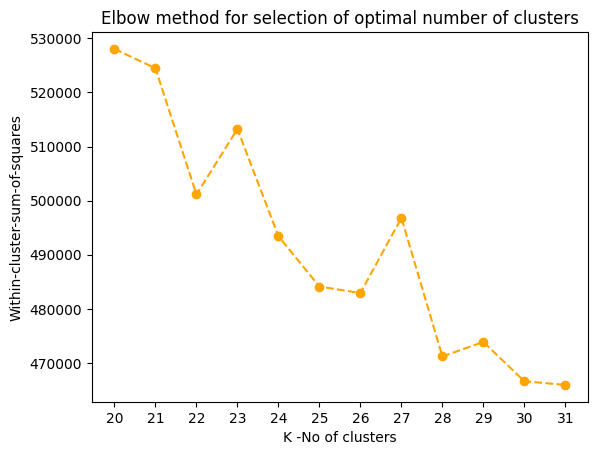

In [29]:
"""This code creates an elbow plot to visualize the relationship between the number of clusters (K) and the within-cluster sum of squares (WCSS) from the previous K-means clustering analysis. The plot helps identify the optimal number of clusters by looking for an "elbow" point where increasing K yields diminishing returns in reducing WCSS. The plot uses orange dashed lines with markers, showing K values from 20 to 32 on the x-axis, and is used to make an informed decision about the best clustering configuration for the mission statement data.
"""
import matplotlib.pyplot as plt
plt.plot(list(cluster_range),wcss_values,marker='o',linestyle='dashed',color='orange')
plt.xlabel('K -No of clusters')
plt.ylabel('Within-cluster-sum-of-squares')
plt.xticks(list(cluster_range))
plt.title('Elbow method for selection of optimal number of clusters')
plt.show()

### **Silhouette score**

In [30]:
"""This code calculates silhouette scores for different K-means clustering configurations (k=20 to 31) to evaluate cluster quality. It uses GPU-accelerated FAISS clustering on the vectorized mission statement data, standardizes features, and saves the silhouette scores for each k value. The silhouette analysis helps determine the optimal number of clusters by measuring how similar objects are to their own cluster compared to other clusters. The code tracks execution time using datetime stamps and persists results using pickle. This follows the elbow method analysis from previous cells to provide another metric for selecting the best k value.
"""
from sklearn.metrics import silhouette_score
cluster_range = range(20, 32)
#wcss_values=[]
np.random.seed(42)
silhouette_avg_values=[]
# Iterate over the cluster numbers and compute the silhouette scores with tqdm
for num_clusters in cluster_range:
    # Create the pipeline with StandardScaler and KMeans clustering using faiss
    kmeans = faiss.Kmeans(d=vec_df_dense.shape[1], k=num_clusters, niter=300, nredo=10, gpu=True)
    pipeline = make_pipeline(StandardScaler(), kmeans)

    # Train the KMeans directly with faiss on the data
    kmeans.train(vec_df_dense)

    #calculate within-cluster-sum-of-square (WCSS)
    #D, I = kmeans.index.search(vec_df_dense.astype(np.float32), 1)  # Find nearest centroid for each point
    # Predict cluster assignments for the data
    kmeans_labels = kmeans.index.search(vec_df_dense.astype(np.float32), 1)[1].flatten()

    # Calculate silhouette score
    print('start',num_clusters,datetime.datetime.now())
    silhouette_avg = silhouette_score(vec_df_dense, kmeans_labels)
    silhouette_avg_values.append(silhouette_avg)

    with open("silhouette_values", "wb") as fp:
         pickle.dump(silhouette_avg_values, fp)

    print('complete ',num_clusters,silhouette_avg,datetime.datetime.now())
print('[INFO] ->Complete ....')

start 20 2025-03-18 18:49:59.186647
complete  20 0.122132 2025-03-18 18:56:34.024670
start 21 2025-03-18 18:57:31.944029
complete  21 0.105562925 2025-03-18 19:03:45.665482
start 22 2025-03-18 19:04:49.541487
complete  22 0.1301101 2025-03-18 19:11:07.608419
start 23 2025-03-18 19:12:17.969552
complete  23 0.10742529 2025-03-18 19:18:40.162109
start 24 2025-03-18 19:19:46.351979
complete  24 0.13030924 2025-03-18 19:26:08.387865
start 25 2025-03-18 19:27:23.187855
complete  25 0.11637223 2025-03-18 19:33:46.582192
start 26 2025-03-18 19:35:05.239002
complete  26 0.10708097 2025-03-18 19:41:38.441483
start 27 2025-03-18 19:43:12.595384
complete  27 0.10547349 2025-03-18 19:49:33.197942
start 28 2025-03-18 19:50:55.114715
complete  28 0.12044759 2025-03-18 19:56:57.351642
start 29 2025-03-18 19:58:23.927161
complete  29 0.10683503 2025-03-18 20:04:27.552762
start 30 2025-03-18 20:05:56.795058
complete  30 0.1052418 2025-03-18 20:11:57.345322
start 31 2025-03-18 20:13:36.661284
complete  

In [31]:
"""Loads the previously calculated silhouette scores from a pickle file into silhouette_avg_values_final variable. The silhouette scores were computed for different K-means cluster configurations (k=20 to 32) to help determine the optimal number of clusters for mission statement analysis. This continues the clustering evaluation process from previous cells where scores were calculated and saved.
"""
silhouette_avg_values_final=pd.read_pickle("silhouette_values")

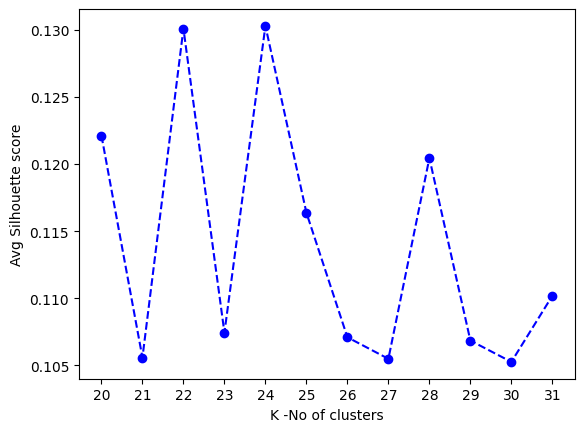

In [32]:
"""This code visualizes the average silhouette scores for different numbers of clusters (K ranging from 20 to 32) in a line plot. It plots the silhouette scores previously calculated and stored in silhouette_avg_values_final against the number of clusters to help determine the optimal number of clusters. The plot uses blue markers connected by dashed lines for better visibility. Higher silhouette scores indicate better-defined clusters, helping to identify the most appropriate K value for the K-means clustering of mission statements.
"""
import matplotlib.pyplot as plt
plt.plot(list(range(20,32)), silhouette_avg_values_final,marker='o',linestyle='dashed',color='blue')
plt.xlabel('K -No of clusters')
plt.ylabel('Avg Silhouette score')
plt.xticks(list(range(20,32)))
plt.show()

#### **K-value 24 is selected as the optimal value**

## **Clustering Analysis**

### **Percentages of number of orgs grouped by NTTE code and cluster number**

In [7]:
filename="Feature_Creation_Base_990PF.csv"

In [8]:
orig_form990s = pd.read_csv(filename,index_col = 'org_EIN')

In [9]:
keep_cols = [
    'org_name_fix',
    'org_classification_code'
]
orig_form990s = orig_form990s[keep_cols]

In [10]:
orig_form990s['ntee_letter'] = orig_form990s.org_classification_code.str[0]
ntee_map = {'A': 'Arts, Culture, and Humanities',
            'B': 'Education',
            'C': 'Environment',
            'D': 'Animal Related',
            'E': 'Health care',
            'F': 'Mental Health and Crisis Intervention',
            'G': 'Diseases, Disorders, and Medical Disciplines',
            'H': 'Medical Research',
            'I': 'Crime and Legal Related',
            'J': 'Employment',
            'K': 'Food, Agriculture and Nutrition',
            'L': 'Housing and Shelter',
            'M': 'Public Safety, Disaster Preparedness and Relief',
            'N': 'Recreation and Sports',
            'O': 'Youth Development',
            'P': 'Human Services',
            'Q': 'International, Foreign Affairs and National Security',
            'R': 'Civil Rights, Social Action and Advocacy',
            'S': 'Community Improvement and Capacity Building',
            'T': 'Philanthropy, Voluntarism and Grantmaking Foundations',
            'U': 'Science and Technology',
            'V': 'Social Science',
            'W': 'Public and Societal Benefit',
            'X': 'Religion Related',
            'Y': 'Mutual and Membership Benefit',
            'Z': 'Unknown, Unclassified'
           }
orig_form990s['ntee_desc'] = orig_form990s.ntee_letter.map(ntee_map)
orig_form990s= orig_form990s.reset_index()

In [11]:
print(orig_form990s.head(3))

     org_EIN                org_name_fix org_classification_code ntee_letter  \
0  471714999  Hope Global Foundation Inc                     X20           X   
1  526854620   Victory Foundation 042165                     T20           T   
2  136106436    Howard S Bunn Foundation                     T20           T   

                                           ntee_desc  
0                                   Religion Related  
1  Philanthropy, Voluntarism and Grantmaking Foun...  
2  Philanthropy, Voluntarism and Grantmaking Foun...  


In [12]:
form990s=pd.read_csv("form990_final.csv")

In [13]:
full_form990s = pd.merge(form990s,orig_form990s,on='org_EIN')

In [14]:
full_form990s.to_csv('full_form990_processed.csv', index=False)
print('[INFO] -> Merging of Original Form 990 with Cluster Labelled Form 990 Complete ....')
print()

[INFO] -> Merging of Original Form 990 with Cluster Labelled Form 990 Complete ....



In [15]:
cluster_range = range(20, 32)

In [16]:
# Analyze Distribution of NTEE in each cluster for different k values
cluster_props = {}

for k in cluster_range:

    cluster_counts_k = full_form990s[[f'cluster_{k}', 'ntee_desc', 'org_name_fix']].groupby([f'cluster_{k}', 'ntee_desc']).count()

    cluster_counts_k = cluster_counts_k.reset_index().pivot(index=f'cluster_{k}', columns='ntee_desc', values='org_name_fix')

    cluster_props[k] = cluster_counts_k.div(cluster_counts_k.sum(1), 0)

with open('cluster_results.pkl', 'wb') as f:
    pickle.dump(cluster_props, f)
print('[INFO] -> Program Complete .....')

[INFO] -> Program Complete .....


In [17]:
# """This code performs the final integration and analysis of clustered Form 990 data:

# 1. Loads the original Form 990 data from a ZIP file, removing duplicates and keeping only relevant columns (business name and NTEE codes)

# 2. Creates an NTEE code mapping dictionary to translate single-letter codes into descriptive categories (e.g., 'A' -> 'Arts, Culture, and Humanities')

# 3. Merges the previously clustered Form 990 data with the original data using EIN as the key, combining cluster assignments with organization metadata

# 4. Calculates the distribution of NTEE categories within each cluster configuration (for k=20 to 31) by:
# - Grouping organizations by cluster number and NTEE description
# - Computing the proportion of each NTEE category in each cluster
# - Storing results in cluster_props dictionary

# 5. Saves the merged dataset and cluster analysis results for further analysis

# This cell connects the clustering results from previous cells with the original organization metadata to enable interpretation of cluster compositions.
# """
# #NOTE: YOU CAN LOAD THE form990_final.pkl to see how various cluster's label are formed


# # orig_filepath = r"2019_990_All Form 990 Filers (compiled from 2020-2021 IRS File Extractions) w Text Vars and NTEE codes (2,130 missing) (N = 269,217)_2023.2.14.csv"

# # with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
# #     # Open the CSV file within the ZIP
# #         with zip_file.open(filename) as csv_file:
# #             # Read the CSV file into a pandas DataFrame
# #             orig_form990s = pd.read_csv(csv_file, 
# #                                    index_col = 'ein',parse_dates=['return_created'])

# # orig_form990s = pd.read_csv(
# #     filename,
# #     index_col = 'ein',
# #     parse_dates=['return_created']
# # )

# # Remove duplicate form 990s by keeping latest submission
# #orig_form990s.sort_values('return_created', inplace=True)
# orig_form990s['ein'] = orig_form990s.index #?
# orig_form990s.drop_duplicates(
#     subset='ein',
#     keep='last',
#     inplace=True
# )
# orig_form990s.drop('ein', axis=1, inplace=True)

# # Select only columns I wish to keep
# keep_cols = [
#     'business_name',
#     'ntee_full'
# ]
# orig_form990s = orig_form990s[keep_cols]

# # Add NTEE code and Description columns
# orig_form990s['ntee_letter'] = orig_form990s.ntee_full.str[0]
# ntee_map = {'A': 'Arts, Culture, and Humanities',
#             'B': 'Education',
#             'C': 'Environment',
#             'D': 'Animal Related',
#             'E': 'Health care',
#             'F': 'Mental Health and Crisis Intervention',
#             'G': 'Diseases, Disorders, and Medical Disciplines',
#             'H': 'Medical Research',
#             'I': 'Crime and Legal Related',
#             'J': 'Employment',
#             'K': 'Food, Agriculture and Nutrition',
#             'L': 'Housing and Shelter',
#             'M': 'Public Safety, Disaster Preparedness and Relief',
#             'N': 'Recreation and Sports',
#             'O': 'Youth Development',
#             'P': 'Human Services',
#             'Q': 'International, Foreign Affairs and National Security',
#             'R': 'Civil Rights, Social Action and Advocacy',
#             'S': 'Community Improvement and Capacity Building',
#             'T': 'Philanthropy, Voluntarism and Grantmaking Foundations',
#             'U': 'Science and Technology',
#             'V': 'Social Science',
#             'W': 'Public and Societal Benefit',
#             'X': 'Religion Related',
#             'Y': 'Mutual and Membership Benefit',
#             'Z': 'Unknown, Unclassified'
#            }
# orig_form990s['ntee_desc'] = orig_form990s.ntee_letter.map(ntee_map)
# orig_form990s= orig_form990s.reset_index()

# print(orig_form990s.head(3))
# # Merge Orig form 990s with cluster labeled form 990s
# full_form990s = pd.merge(form990s,orig_form990s,on='ein')
# full_form990s.to_csv('full_form990_processed.csv', index=False)
# print('[INFO] -> Merging of Original Form 990 with Cluster Labelled Form 990 Complete ....')
# print()

# # Analyze Distribution of NTEE in each cluster for different k values
# cluster_props = {}

# for k in cluster_range:

#     cluster_counts_k = full_form990s[[f'cluster_{k}', 'ntee_desc', 'business_name']].groupby([f'cluster_{k}', 'ntee_desc']).count()

#     cluster_counts_k = cluster_counts_k.reset_index().pivot(index=f'cluster_{k}', columns='ntee_desc', values='business_name')

#     cluster_props[k] = cluster_counts_k.div(cluster_counts_k.sum(1), 0)

# with open('cluster_results.pkl', 'wb') as f:
#     pickle.dump(cluster_props, f)
# print('[INFO] -> Program Complete .....')


In [18]:
"""This code displays the merged DataFrame 'full_form990s' which contains the original Form 990 data combined with cluster labels. The DataFrame includes organization information (EIN, business name, NTEE codes and descriptions) along with cluster assignments for different k values (20-31) generated from the previous K-means clustering analysis. This merged dataset is used to analyze how different types of nonprofit organizations are distributed across the identified clusters, helping understand patterns in innovation-related language across different sectors.
"""
full_form990s

,org_EIN,0,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,org_name_fix,org_classification_code,ntee_letter,ntee_desc
0,471714999,hope global foundation inc fight hunger po...,16,17,11,20,9,0,14,10,23,4,3,16,Hope Global Foundation Inc,X20,X,Religion Related
1,526854620,victory foundation 042165,3,19,13,8,8,4,10,2,11,13,0,13,Victory Foundation 042165,T20,T,"Philanthropy, Voluntarism and Grantmaking Foun..."
2,136106436,howard bunn foundation,3,19,13,8,8,4,10,2,11,13,0,13,Howard S Bunn Foundation,T20,T,"Philanthropy, Voluntarism and Grantmaking Foun..."
3,465646185,lba community foundation inc,0,13,0,14,4,7,11,18,16,10,28,27,Lba Community Foundation Inc,T31,T,"Philanthropy, Voluntarism and Grantmaking Foun..."
4,66028722,kent sidney tr kent librar,17,6,18,0,0,19,19,20,14,2,18,0,Kent Sidney A Tr For Kent Librar,B70,B,Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133048,256018977,painter r mckeesport hosp mission provide qual...,14,14,9,4,12,5,13,4,4,25,24,20,Painter R For Mckeesport Hosp,E22,E,Health care
133049,752528901,lockheed martin employee charity fund fund ...,11,18,2,6,5,15,8,19,13,16,8,6,Lockheed Martin Employee Charity Fund,Y99,Y,Mutual and Membership Benefit
133050,436882508,william f mary louise wischmeyer family founda...,5,14,14,1,23,3,2,9,10,11,5,11,William F And Mary Louise Wischmeyer Family Fo...,T20,T,"Philanthropy, Voluntarism and Grantmaking Foun..."
133051,871759737,bend fence foundation bend fence foundation de...,11,18,2,6,5,11,8,19,27,17,27,10,Bended Fences Foundation,Z999,Z,"Unknown, Unclassified"


In [19]:
"""This code loads the previously processed Form 990 dataset with cluster assignments from a CSV file named "form990_final.csv" into a pandas DataFrame called form990s. This DataFrame contains both the original Form 990 text data and the cluster labels assigned to each organization during the k-means clustering process. This loaded data will be used for further analysis of the clustering results and organization classification. The file was created in previous cells after performing text preprocessing and clustering operations.
"""
form990s=pd.read_csv("form990_final.csv")

In [20]:
"""This code displays the first 3 rows of the form990s DataFrame containing processed mission statements and cluster assignments for non-profit organizations. The form990s DataFrame was previously created from the cleaned and processed Form 990 text data, containing organization IDs (EINs) as the index and includes cluster labels for different k values (20-31) from the K-means clustering analysis. This provides a preview of how the mission statement data and clustering results are structured before merging with additional organization metadata.
"""
form990s.head(3)

,org_EIN,0,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31
0,471714999,hope global foundation inc fight hunger po...,16,17,11,20,9,0,14,10,23,4,3,16
1,526854620,victory foundation 042165,3,19,13,8,8,4,10,2,11,13,0,13
2,136106436,howard bunn foundation,3,19,13,8,8,4,10,2,11,13,0,13


### **Count of orgs grouped by NTEE code and cluster number**

In [21]:
orig_form990s = pd.read_csv(filename,index_col = 'org_EIN')

In [22]:
keep_cols = [
    'org_name_fix',
    'org_classification_code'
]
orig_form990s = orig_form990s[keep_cols]

In [23]:
orig_form990s['ntee_letter'] = orig_form990s.org_classification_code.str[0]
ntee_map = {'A': 'Arts, Culture, and Humanities',
            'B': 'Education',
            'C': 'Environment',
            'D': 'Animal Related',
            'E': 'Health care',
            'F': 'Mental Health and Crisis Intervention',
            'G': 'Diseases, Disorders, and Medical Disciplines',
            'H': 'Medical Research',
            'I': 'Crime and Legal Related',
            'J': 'Employment',
            'K': 'Food, Agriculture and Nutrition',
            'L': 'Housing and Shelter',
            'M': 'Public Safety, Disaster Preparedness and Relief',
            'N': 'Recreation and Sports',
            'O': 'Youth Development',
            'P': 'Human Services',
            'Q': 'International, Foreign Affairs and National Security',
            'R': 'Civil Rights, Social Action and Advocacy',
            'S': 'Community Improvement and Capacity Building',
            'T': 'Philanthropy, Voluntarism and Grantmaking Foundations',
            'U': 'Science and Technology',
            'V': 'Social Science',
            'W': 'Public and Societal Benefit',
            'X': 'Religion Related',
            'Y': 'Mutual and Membership Benefit',
            'Z': 'Unknown, Unclassified'
           }
orig_form990s['ntee_desc'] = orig_form990s.ntee_letter.map(ntee_map)
orig_form990s= orig_form990s.reset_index()

In [24]:
full_form990s = pd.merge(form990s,orig_form990s,on='org_EIN')
full_form990s.to_csv('full_form990_processed.csv', index=False)
print('[INFO] -> Merging of Original Form 990 with Cluster Labelled Form 990 Complete ....')
print()

# Analyze Distribution of NTEE in each cluster for different k values
cluster_counts = {}

for k in range(20,32):

    cluster_counts_k = full_form990s[[f'cluster_{k}', 'ntee_desc', 'org_name_fix']].groupby([f'cluster_{k}', 'ntee_desc']).count()

    cluster_counts_k = cluster_counts_k.reset_index().pivot(index=f'cluster_{k}', columns='ntee_desc', values='org_name_fix')

    cluster_counts[k] = cluster_counts_k

with open('cluster_results_counts.pkl', 'wb') as f:
    pickle.dump(cluster_counts, f)
print('[INFO] -> Program Complete .....')


[INFO] -> Merging of Original Form 990 with Cluster Labelled Form 990 Complete ....

[INFO] -> Program Complete .....


In [25]:
# """This code processes and analyzes Form 990 tax return data for nonprofit organizations. It first reads the original Form 990 data from a zip file, removes duplicate entries keeping only the latest submissions, and extracts business names and NTEE (National Taxonomy of Exempt Entities) codes. The code then adds NTEE classifications by mapping letter codes to descriptive categories (e.g., 'A' maps to 'Arts, Culture, and Humanities'). The processed data is merged with previously generated cluster labels (from k-means clustering) based on EIN (Employer Identification Number). Finally, it calculates and stores the distribution counts of organizations across different NTEE categories for each cluster configuration (k=20 to 31). The results are saved to disk for further analysis. This cell builds on previous clustering analysis to understand how different types of nonprofits are grouped together based on their mission statements.
# """
# #NOTE: YOU CAN LOAD THE form990_final.pkl to see how various cluster's label are formed


# # orig_filepath = r"2019_990_All Form 990 Filers (compiled from 2020-2021 IRS File Extractions) w Text Vars and NTEE codes (2,130 missing) (N = 269,217)_2023.2.14.csv"
# #counts:-

# with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
#     # Open the CSV file within the ZIP
#         with zip_file.open(filename) as csv_file:
#             # Read the CSV file into a pandas DataFrame
#             orig_form990s = pd.read_csv(csv_file, 
#                                    index_col = 'ein',parse_dates=['return_created'])

# # filename = r"/content/drive/MyDrive/P990/2019_990_All Form 990 Filers (compiled from 2020-2021 IRS File Extractions) w Text Vars and NTEE codes (2,130 missing) (N = 269,217)_2023.2.14.csv"
# # orig_form990s = pd.read_csv(
# #     filename,
# #     index_col = 'ein',
# #     parse_dates=['return_created']
# # )

# # Remove duplicate form 990s by keeping latest submission
# orig_form990s.sort_values('return_created', inplace=True)
# orig_form990s['ein'] = orig_form990s.index #?
# orig_form990s.drop_duplicates(
#     subset='ein',
#     keep='last',
#     inplace=True
# )
# orig_form990s.drop('ein', axis=1, inplace=True)

# # Select only columns I wish to keep
# keep_cols = [
#     'business_name',
#     'ntee_full'
# ]
# orig_form990s = orig_form990s[keep_cols]

# # Add NTEE code and Description columns
# orig_form990s['ntee_letter'] = orig_form990s.ntee_full.str[0]
# ntee_map = {'A': 'Arts, Culture, and Humanities',
#             'B': 'Education',
#             'C': 'Environment',
#             'D': 'Animal Related',
#             'E': 'Health care',
#             'F': 'Mental Health and Crisis Intervention',
#             'G': 'Diseases, Disorders, and Medical Disciplines',
#             'H': 'Medical Research',
#             'I': 'Crime and Legal Related',
#             'J': 'Employment',
#             'K': 'Food, Agriculture and Nutrition',
#             'L': 'Housing and Shelter',
#             'M': 'Public Safety, Disaster Preparedness and Relief',
#             'N': 'Recreation and Sports',
#             'O': 'Youth Development',
#             'P': 'Human Services',
#             'Q': 'International, Foreign Affairs and National Security',
#             'R': 'Civil Rights, Social Action and Advocacy',
#             'S': 'Community Improvement and Capacity Building',
#             'T': 'Philanthropy, Voluntarism and Grantmaking Foundations',
#             'U': 'Science and Technology',
#             'V': 'Social Science',
#             'W': 'Public and Societal Benefit',
#             'X': 'Religion Related',
#             'Y': 'Mutual and Membership Benefit',
#             'Z': 'Unknown, Unclassified'
#            }
# orig_form990s['ntee_desc'] = orig_form990s.ntee_letter.map(ntee_map)
# orig_form990s= orig_form990s.reset_index()

# print(orig_form990s.head(3))
# # Merge Orig form 990s with cluster labeled form 990s
# full_form990s = pd.merge(form990s,orig_form990s,on='ein')
# full_form990s.to_csv('full_form990_processed.csv', index=False)
# print('[INFO] -> Merging of Original Form 990 with Cluster Labelled Form 990 Complete ....')
# print()

# # Analyze Distribution of NTEE in each cluster for different k values
# cluster_counts = {}

# for k in range(20,32):

#     cluster_counts_k = full_form990s[[f'cluster_{k}', 'ntee_desc', 'business_name']].groupby([f'cluster_{k}', 'ntee_desc']).count()

#     cluster_counts_k = cluster_counts_k.reset_index().pivot(index=f'cluster_{k}', columns='ntee_desc', values='business_name')

#     cluster_counts[k] = cluster_counts_k

# with open('cluster_results_counts.pkl', 'wb') as f:
#     pickle.dump(cluster_counts, f)
# print('[INFO] -> Program Complete .....')


In [26]:
"""This code loads previously calculated cluster count results from a pickle file named "cluster_results_counts.pkl". The cluster_counts variable contains counts of organizations grouped by both cluster number and NTEE (National Taxonomy of Exempt Entities) descriptive categories. This data is used for analyzing the distribution of different types of nonprofit organizations across the clusters that were created in previous clustering steps. It relates to the earlier cells that performed K-means clustering and is used for subsequent analysis of cluster compositions.
"""
#Loading counts
cluster_counts=pd.read_pickle("cluster_results_counts.pkl")

In [27]:
"""This code cell loads previously saved percentage data that contains the distribution of organizations across different clusters and NTEE codes. The data is loaded from a pickle file named "cluster_results.pkl" which was created earlier when analyzing cluster proportions. This complements the counts data loaded in the previous cell and will be used for analyzing the relative distribution of organizations within each cluster.
"""
#Loading percentages
cluster_props=pd.read_pickle("cluster_results.pkl")

In [28]:
"""This code cell displays cluster analysis results for k=24 clusters, showing the percentage distribution of organizations across different NTEE (National Taxonomy of Exempt Entities) categories within each cluster. It first enables pandas to show all columns without truncation, then accesses and displays the proportions matrix for k=26 from the previously calculated cluster_props dictionary, where rows represent clusters and columns represent NTEE categories. This allows examination of how organizations with different missions are distributed across the 26 clusters determined to be optimal from earlier elbow and silhouette analysis.
"""
pd.set_option('display.max_columns', None)
cluster_props[24]

ntee_desc,Animal Related,"Arts, Culture, and Humanities","Civil Rights, Social Action and Advocacy",Community Improvement and Capacity Building,Crime and Legal Related,"Diseases, Disorders, and Medical Disciplines",Education,Employment,Environment,"Food, Agriculture and Nutrition",Health care,Housing and Shelter,Human Services,"International, Foreign Affairs and National Security",Medical Research,Mental Health and Crisis Intervention,Mutual and Membership Benefit,"Philanthropy, Voluntarism and Grantmaking Foundations","Public Safety, Disaster Preparedness and Relief",Public and Societal Benefit,Recreation and Sports,Religion Related,Science and Technology,Social Science,"Unknown, Unclassified",Youth Development
cluster_24,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.003046,0.016920,NaN,0.004399,0.000338,0.002707,0.065313,NaN,0.002030,0.001015,0.032149,0.001692,0.007783,NaN,NaN,0.000338,0.003384,0.586125,0.000338,0.004738,0.005415,0.038917,NaN,NaN,0.219628,0.003723
1,0.005567,0.036943,0.001012,0.009615,0.003543,0.025810,0.072368,0.001012,0.025304,0.003543,0.029858,0.003543,0.005567,0.007085,0.044534,0.006073,NaN,0.407895,0.001518,0.003036,0.003036,0.007085,0.020243,0.023279,0.252024,0.000506
2,0.004952,0.014608,0.000248,0.002971,0.000248,0.004952,0.055459,0.000743,0.001486,NaN,0.019559,0.003714,0.007923,NaN,0.000495,0.000495,0.000990,0.667987,0.000743,0.001981,0.007428,0.038128,0.000248,NaN,0.162664,0.001981
3,0.004548,0.022739,0.002099,0.005772,0.001574,0.004548,0.214623,0.000350,0.004898,0.001574,0.003673,0.002099,0.007347,0.006122,0.000175,0.001749,0.001050,0.499913,0.000175,0.003149,0.009970,0.006822,0.001050,0.000175,0.191534,0.002274
4,0.002859,0.014653,0.000357,0.003574,0.001072,0.006076,0.072552,0.000357,0.001072,0.000357,0.010365,0.003931,0.008935,NaN,0.000357,NaN,0.000357,0.633310,0.001430,0.000715,0.008935,0.013581,0.001430,0.000357,0.213009,0.000357
5,0.010826,0.004571,0.000361,0.001203,0.000722,0.007819,0.006015,0.000361,0.001323,0.000601,0.008421,0.003368,0.005774,0.000361,0.000481,0.001804,0.000842,0.600385,0.000842,0.001083,0.005894,0.007819,0.001203,0.000120,0.327559,0.000241
6,0.002269,0.016125,0.000836,0.005017,0.002508,0.003822,0.151935,0.000597,0.001911,0.000717,0.001553,0.001553,0.005256,0.002389,0.000239,0.000717,0.001075,0.558290,0.000358,0.000836,0.005017,0.007286,0.000597,NaN,0.227783,0.001314
7,0.003320,0.200885,0.000553,0.006364,0.001937,0.004151,0.020753,0.000277,0.003044,0.000553,0.001107,0.003320,0.008024,0.006364,NaN,0.000277,0.002214,0.382678,0.000277,0.003044,0.010515,0.016049,0.001384,NaN,0.322357,0.000553
8,0.003186,0.010831,0.001274,0.002867,0.001274,0.003823,0.024530,0.000637,0.001911,0.000319,0.003823,0.003823,0.003504,0.001274,0.000637,NaN,0.000637,0.659446,0.000319,0.001274,0.008920,0.011150,0.000956,NaN,0.252628,0.000956


In [29]:
"""This code calculates the sum of organizations in each cluster for k=26 (selected optimal k value) by summing across all NTEE categories. It creates a Series named 'Cluster sum' containing the total count of organizations in each cluster, which helps understand the size distribution of clusters. This allows analysis of how many organizations fall into each cluster after the k-means clustering was performed earlier.
"""
cluster_sum=cluster_counts[24].sum(axis=1)
cluster_sum.name='Cluster sum'

In [30]:
"""This code processes cluster analysis results for K=26 by selecting specific NTEE categories (Education, Science/Tech, Community Improvement, Philanthropy, and Medical Research) and calculates cumulative sums across clusters. It merges the cluster proportions with cluster size totals to help identify which clusters contain the highest concentrations of innovation-related organizations. The code builds on previous clustering analysis to prepare data for determining innovation-focused clusters based on their composition of relevant NTEE categories.
"""
#get top n props until sum adds up to <=87,000 and assign them with label 1
final_cluster = cluster_props[24][['Diseases, Disorders, and Medical Disciplines','Medical Research', 'Science and Technology', 'Food, Agriculture and Nutrition', 'Social Science']]
final_cluster = final_cluster.sort_index(ascending=False)
# final_cluster=cluster_props[24][cluster_props[24].index.isin(categories)]
# final_cluster=final_cluster.sort_values(ascending=False)
# final_cluster = cluster_props[24][categories]
final_cluster_merge=pd.merge(final_cluster,cluster_sum,on='cluster_24')
final_cumulative_sum=final_cluster_merge['Cluster sum'].cumsum()
final_cumulative_sum.name='Cumulative sum'
final_merge=pd.merge(final_cluster_merge,final_cumulative_sum,on='cluster_24')


# final_cluster_merge = pd.merge(final_cluster.reset_index(), cluster_sum, left_on='cluster_24',right_index=True)

In [31]:
# """This code processes the clustered Form 990 data to identify organizations focused on innovation based on their mission statements. It:

# 1. Loads the processed Form 990 data containing cluster assignments and organizational details
# 2. Creates a cluster mapping that flags specific clusters as innovation-related (True/False)
# 3. Combines cluster-based classification with NTEE code filtering (B,U,S,T,H categories) to create final innovation classification
# 4. Handles duplicate EIN entries by replicating relevant rows to match the original dataset structure
# 5. Outputs final results with columns for EIN, mission text, organization name, innovation classification, and NTEE code

# The code depends on previously generated clustering results and the original Form 990 dataset. The final output is saved as 'Spacy_Results.csv' containing binary innovation classifications for each organization.
# """
# df2=pd.read_csv('full_form990_processed.csv')



# ## CLUSTER MAP VARIABLE DEPENDS ON THE cluster_results.pkl VALUES. THIS VARIABLE WILL BE DIFFERENT FOR EACH TYPE OF CLASSIFIER
# cluster_map = {
#     0: True,
#     1: False,
#     2: False,
#     3: False,
#     4: False,
#     5: False,
#     6: False,
#     7: True,
#     8: False,
#     9: False,
#     10: False,
#     11: False,
#     12: False,
#     13: False,
#     14: False,
#     15: False,
#     16: False,
#     17: False,
#     18: False,
#     19: False,
#     20: False,
#     21: False,
#     22: False,
#     23: False,
#     24:False,
#     25:False,
#     26:False,
#     27:False,
#     28:True,
#     29:False,
#     30:False
# }



# cluster_TF = df2['cluster_24'].map(cluster_map)



# innovation_TF = df2['ntee_letter'].apply(lambda x: True if x in ['G', 'H', 'U', 'K', 'V'] else False)
# df2['is_env'] = cluster_TF | innovation_TF




# # Select specific columns and rename them
# df3 = df2[['ein', '0','business_name','is_env', 'ntee_letter']]
# df3.rename(columns={'0':'mission_statement_text','is_env': 'Spacy_Classification'}, inplace=True)





# df3['Spacy_Classification'] = df3['Spacy_Classification'].astype(int)



# with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
#     # Open the CSV file within the ZIP
#         with zip_file.open(filename) as csv_file:
#             # Read the CSV file into a pandas DataFrame
#             orig_form990s = pd.read_csv(csv_file, 
#                                    index_col = 'ein',parse_dates=['return_created'])

# #Add this code under the orig_form990s
# duplicate_eins = orig_form990s[orig_form990s.index.duplicated(keep='first')]
# ein_counts = duplicate_eins.index.value_counts()


# replicated_rows = []

# # Iterate through unique EINs and their occurrence counts
# for ein, count in ein_counts.items():
#     if ein in df3['ein'].values:
#         num_replicas = count
#         if num_replicas > 0:
#             rows_to_replicate = df3[df3['ein'] == ein].iloc[0].to_dict()
#             replicated_rows.extend([rows_to_replicate] * num_replicas)


# replicated_rows_df = pd.DataFrame(replicated_rows)


# # Append replicated rows to df3
# df3_replicated = pd.concat([replicated_rows_df], ignore_index=True)

# df3_replicated.to_csv('Spacy_Results.csv',index=False)
# df3_replicated = pd.read_csv('Spacy_Results.csv')




In [32]:
"""This code cell displays the merged and processed cluster analysis results for k=26, showing the percentages and cumulative sums for specific NTEE categories (Education, Science and Technology, Community Improvement, Philanthropy, and Medical Research). The data includes cluster proportions sorted by cluster number and shows both individual cluster sizes and running totals, which helps visualize how the organizations are distributed across these key categories. This follows the previous clustering analysis and helps determine significant groupings in the mission statement data.
"""
final_merge

,"Diseases, Disorders, and Medical Disciplines",Medical Research,Science and Technology,"Food, Agriculture and Nutrition",Social Science,Cluster sum,Cumulative sum
cluster_24,,,,,,,
23,0.013571,0.000112,0.000561,0.000112,NaN,8916.0,8916.0
22,0.010112,0.005056,0.003652,0.001966,0.001685,3560.0,12476.0
21,0.009067,0.002133,0.000533,0.000533,NaN,1875.0,14351.0
20,0.009490,NaN,0.000297,0.000890,0.000297,3372.0,17723.0
19,0.002792,NaN,0.000804,0.000592,0.000042,23635.0,41358.0
18,0.003266,0.000544,0.011432,0.001089,0.004899,1837.0,43195.0
17,0.004139,0.000138,0.001793,0.002483,0.000138,7249.0,50444.0
16,0.005124,NaN,0.001366,0.001025,NaN,5855.0,56299.0
15,0.004196,NaN,0.000976,0.001366,NaN,10247.0,66546.0


In [33]:
"""This code cell assigns a boolean value to a new 'cluster_map' column in the final_merge DataFrame based on whether the cumulative sum of mission statements in each cluster is less than or equal to 40,034 (representing 15% of total mission statements for Innovation). The threshold helps identify clusters that collectively contain a significant portion of innovation-related organizations. The DataFrame is then displayed showing the cluster mapping results alongside the previous metrics like cluster sums and proportions of different organization types.
"""
final_merge['cluster_map']=final_merge['Cumulative sum']<=15919 #12% of total mission statements for Invention
final_merge

,"Diseases, Disorders, and Medical Disciplines",Medical Research,Science and Technology,"Food, Agriculture and Nutrition",Social Science,Cluster sum,Cumulative sum,cluster_map
cluster_24,,,,,,,,
23,0.013571,0.000112,0.000561,0.000112,NaN,8916.0,8916.0,True
22,0.010112,0.005056,0.003652,0.001966,0.001685,3560.0,12476.0,True
21,0.009067,0.002133,0.000533,0.000533,NaN,1875.0,14351.0,True
20,0.009490,NaN,0.000297,0.000890,0.000297,3372.0,17723.0,False
19,0.002792,NaN,0.000804,0.000592,0.000042,23635.0,41358.0,False
18,0.003266,0.000544,0.011432,0.001089,0.004899,1837.0,43195.0,False
17,0.004139,0.000138,0.001793,0.002483,0.000138,7249.0,50444.0,False
16,0.005124,NaN,0.001366,0.001025,NaN,5855.0,56299.0,False
15,0.004196,NaN,0.000976,0.001366,NaN,10247.0,66546.0,False


### **Cluster map**

In [34]:
"""This code cell creates a cluster mapping dictionary that assigns boolean values (True/False) to cluster indices based on the 'cluster_map' column from the final_merge DataFrame. This mapping identifies which clusters contain the top organizations representing innovation features based on their cumulative counts being within the 15% threshold (40,034 mission statements) established earlier. The cluster_map dictionary will be used later to classify organizations as innovative or not based on their cluster assignments. The mapping converts the DataFrame format into a more easily usable dictionary structure for subsequent classification steps.
"""
cluster_map={}
for i in final_merge.index:
  cluster_map[i]=final_merge.loc[i]['cluster_map']
cluster_map=cluster_map

In [35]:
"""This code defines a dictionary mapping cluster numbers to boolean values based on the cumulative sum threshold calculated in previous cells. The mapping indicates whether each cluster is considered significant for innovation classification (True) or not (False) based on containing organizations with high proportions of education, science/technology, community improvement, philanthropy, and medical research focus areas. This cluster mapping will be used to classify organizations as innovation-focused if they belong to clusters marked as True.
"""
cluster_map

{23: True,
 22: True,
 21: True,
 20: False,
 19: False,
 18: False,
 17: False,
 16: False,
 15: False,
 14: False,
 13: False,
 12: False,
 11: False,
 10: False,
 9: False,
 8: False,
 7: False,
 6: False,
 5: False,
 4: False,
 3: False,
 2: False,
 1: False,
 0: False}

In [36]:
df2=pd.read_csv('full_form990_processed.csv')

In [37]:
cluster_TF = df2['cluster_24'].map(cluster_map)

In [38]:
print(cluster_TF)

0         False
1         False
2         False
3         False
4         False
          ...  
133048    False
133049    False
133050     True
133051    False
133052    False
Name: cluster_24, Length: 133053, dtype: bool


In [39]:
invention_TF = df2['ntee_letter'].apply(lambda x: True if x in ['G', 'H', 'U', 'K', 'V'] else False)
df2['is_env'] = cluster_TF | invention_TF

In [40]:
df3 = df2[['org_EIN', '0','org_name_fix','is_env']]
df3.rename(columns={'0':'mission_statement_text','is_env': 'Spacy_Classification'}, inplace=True)

df3['Spacy_Classification'] = df3['Spacy_Classification'].astype(int)

In [41]:
# """This code processes the clustered mission statements data to create the final innovation classification:

# - Reads the processed form990 data and applies the cluster mapping for cluster 26 (optimal cluster)
# - Creates boolean flags for organizations based on:
#   1. Their cluster assignment using the predefined cluster_map
#   2. Their NTEE code (True if code is B, U, S, T, or H)
# - Combines these flags to create final innovation classification (is_env)
# - Creates final output dataframe (df3) with EIN, mission text, business name and binary innovation classification
# - Converts classification to integer type (0/1)

# The code builds on previous clustering analysis to generate the final innovation feature classification for each organization.
# """
# #select a cluster
# #Cluster 26 is the optimal cluster

# df2=pd.read_csv('full_form990_processed.csv')
# #need form990s- text form990s[0]

# ## CLUSTER MAP VARIABLE DEPENDS ON THE cluster_results.pkl VALUES. THIS VARIABLE WILL BE DIFFERENT FOR EACH TYPE OF CLASSIFIER

# cluster_TF = df2['cluster_26'].map(cluster_map)

# print(cluster_TF)

# innovation_TF = df2['ntee_letter'].apply(lambda x: True if x in ['B', 'U', 'S', 'T', 'H'] else False)
# df2['is_env'] = cluster_TF | innovation_TF

# print(df2)

# # Select specific columns and rename them
# df3 = df2[['ein', '0','business_name','is_env']]
# df3.rename(columns={'0':'mission_statement_text','is_env': 'Spacy_Classification'}, inplace=True)

# df3['Spacy_Classification'] = df3['Spacy_Classification'].astype(int)

# print(df3)



In [42]:
form990s=pd.read_csv('full_form990_processed.csv')# added it

#Add this code under the orig_form990s
duplicate_eins = orig_form990s[orig_form990s.index.duplicated(keep='first')]
ein_counts = duplicate_eins.index.value_counts()


replicated_rows = []

# Iterate through unique EINs and their occurrence counts
for ein, count in ein_counts.items():
    if ein in df3['org_EIN'].values:
        num_replicas = count
        if num_replicas > 0:
            rows_to_replicate = df3[df3['org_EIN'] == ein].iloc[0].to_dict()
            replicated_rows.extend([rows_to_replicate] * num_replicas)



# Append replicated rows to df3
replicated_rows_df = pd.DataFrame(replicated_rows)
df3_replicated = pd.concat([df3, replicated_rows_df], ignore_index=True)

df3_replicated.to_csv('Spacy_results.csv',index=False)

print(df3_replicated)
print('Keyword Section starts')

          org_EIN                             mission_statement_text  \
0       471714999  hope global foundation inc     fight hunger po...   
1       526854620                      victory foundation 042165       
2       136106436                         howard bunn foundation       
3       465646185                   lba community foundation inc       
4        66028722                     kent sidney tr kent librar       
...           ...                                                ...   
133048  256018977  painter r mckeesport hosp mission provide qual...   
133049  752528901  lockheed martin employee charity fund    fund ...   
133050  436882508  william f mary louise wischmeyer family founda...   
133051  871759737  bend fence foundation bend fence foundation de...   
133052  590766981  friday musicale inc friday musicale inc non pr...   

                                             org_name_fix  \
0                              Hope Global Foundation Inc   
1            

In [43]:
from collections import Counter

#get keywords
kw_invention = pd.read_csv('Invention_Keywords.csv', encoding='utf-8', header=None).iloc[:, 0]
#Loads International keywords from a file
#keywords = pd.read_csv(kw_filename, encoding = 'utf-8', header=None).iloc[:,0]
#keywords = pd.Series(terms_list)
keywords = kw_invention
 # Remove leading and trailing spaces
keywords = keywords.str.replace("^\s", "")
keywords = keywords.str.replace("\s$", "")
# Remove non-alphanumeric or space characters
keywords = keywords.str.replace("[^A-Za-z0-9\s\']*", "")
# Remove extra spaces around apostraphe
keywords = keywords.str.replace("\s\'\s", "\'")
# Remove double spaces
keywords = keywords.str.replace("\s{2}", " ")
keywords = keywords.tolist()
print(keywords)

def classify_english_terms(keyword):
    """
    Classifies a keyword using a spaCy model.
    :param keyword: The keyword to be classified.
    :type keyword: str
    :return: A boolean indicating whether the spaCy model's vector for the keyword is non-zero.
    :rtype: bool
    """
    spacy_doc = nlp(keyword)
    return spacy_doc.vector.any()



kw_is_english_list = []
# Classify keywords as English vs Non-English
for keyword in keywords:
    kw_is_english = classify_english_terms(keyword)
    kw_is_english_list.append(bool(kw_is_english))

# Store English and Non-English keywords separately
english_kws = pd.Series(keywords)[pd.Series(kw_is_english_list)].tolist()
nonenglish_kws = pd.Series(keywords)[~pd.Series(kw_is_english_list)].tolist()


# lemmatize only english_kws because english model won't understand non_english words
english_lemmas = []
for kw in english_kws:
    doc = nlp(kw)
    temp_lemmas = []
    for token in doc:
        temp_lemmas.append(token.lemma_)
    lemmas = ' '.join(temp_lemmas)
    english_lemmas.append(lemmas)

# Store english and non-english words in dictionary
kw_dict = {}
kw_dict['english_lemmas'] = english_lemmas
kw_dict['nonenglish'] = nonenglish_kws

#Need to get eng_kws dict again for kw_dict
eng_kws = kw_dict['english_lemmas']
num_kws = len(eng_kws)

#eng_vecs will represent how each keyword is respresnted in terms of a vector
eng_vecs = np.zeros((num_kws, 300))
for i, kw in enumerate(eng_kws):
    eng_vecs[i] = nlp(kw).vector



['Keyword_Phrase', 'Academic innovation', 'Academic research', 'Advanced algorithm', 'Aerospace engineering', 'Aesthetics ', 'Agricultural economics', 'Agricultural environmental engineering', 'Agricultural information engineering', 'Agricultural structure', 'Algorithm development', 'Analytical chemistry', 'Anatomical structure', 'Anatomy', 'Anesthesiology', 'Animal life science', 'Animal physiological chemistry', 'Animal production science', 'Applied anthropology', 'Applied biochemistry', 'Applied condensed matter physics', 'Applied mathematics', 'Applied microbiology', 'Applied molecular biology ', 'Applied physical properties', 'Applied plasma science', 'Applied research', 'Aquatic bioproduction science', 'Aquatic life science', 'Archaeology', 'Architectural environment equipment ', 'Architectural history', 'Architectural planning', 'Area studies', 'art studies', 'Artificial intelligence', 'Astronomy', 'Atmospheric sciences', 'Atomic physics', 'Bacteriology', 'Basic analysis', 'Basi

In [44]:
# """This code cell handles replication of Form 990 data rows and keyword processing for innovation classification:

# 1. Reads original Form 990 data from ZIP file and processes duplicate EINs
# 2. Replicates rows in df3 based on duplicate EIN counts to match original dataset structure
# 3. Processes innovation keywords by:
#    - Loading from CSV and cleaning text (removing spaces, special characters)
#    - Classifying keywords as English vs non-English using spaCy
#    - Lemmatizing English keywords
#    - Converting keywords into word vectors for semantic similarity
# 4. Exports replicated dataset to CSV for further analysis

# The code ensures consistent data structure between original and processed datasets while preparing keywords for innovation classification through semantic similarity.
# """
# #change path for below file

# with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
#     # Open the CSV file within the ZIP
#         with zip_file.open(filename) as csv_file:
#             # Read the CSV file into a pandas DataFrame
#             orig_form990s = pd.read_csv(csv_file, 
#                                    index_col = 'ein',parse_dates=['return_created'])

# form990s=pd.read_csv('full_form990_processed.csv')# added it

# #Add this code under the orig_form990s
# duplicate_eins = orig_form990s[orig_form990s.index.duplicated(keep='first')]
# ein_counts = duplicate_eins.index.value_counts()


# replicated_rows = []

# # Iterate through unique EINs and their occurrence counts
# for ein, count in ein_counts.items():
#     if ein in df3['ein'].values:
#         num_replicas = count
#         if num_replicas > 0:
#             rows_to_replicate = df3[df3['ein'] == ein].iloc[0].to_dict()
#             replicated_rows.extend([rows_to_replicate] * num_replicas)



# # Append replicated rows to df3
# df3_replicated = df3.append(replicated_rows, ignore_index=True)

# df3_replicated.to_csv('Spacy_results.csv',index=False)

# print(df3_replicated)
# print('Keyword Section starts')

# from collections import Counter

# #get keywords
# kw_innovation = pd.read_csv('innovation_keywords.csv', encoding='utf-8', header=None).iloc[:, 0]
# #Loads International keywords from a file
# #keywords = pd.read_csv(kw_filename, encoding = 'utf-8', header=None).iloc[:,0]
# #keywords = pd.Series(terms_list)
# keywords = kw_innovation
#  # Remove leading and trailing spaces
# keywords = keywords.str.replace("^\s", "")
# keywords = keywords.str.replace("\s$", "")
# # Remove non-alphanumeric or space characters
# keywords = keywords.str.replace("[^A-Za-z0-9\s\']*", "")
# # Remove extra spaces around apostraphe
# keywords = keywords.str.replace("\s\'\s", "\'")
# # Remove double spaces
# keywords = keywords.str.replace("\s{2}", " ")
# keywords = keywords.tolist()
# print(keywords)

# def classify_english_terms(keyword):
#     """
#     Classifies a keyword using a spaCy model.
#     :param keyword: The keyword to be classified.
#     :type keyword: str
#     :return: A boolean indicating whether the spaCy model's vector for the keyword is non-zero.
#     :rtype: bool
#     """
#     spacy_doc = nlp(keyword)
#     return spacy_doc.vector.any()



# kw_is_english_list = []
# # Classify keywords as English vs Non-English
# for keyword in keywords:
#     kw_is_english = classify_english_terms(keyword)
#     kw_is_english_list.append(bool(kw_is_english))

# # Store English and Non-English keywords separately
# english_kws = pd.Series(keywords)[pd.Series(kw_is_english_list)].tolist()
# nonenglish_kws = pd.Series(keywords)[~pd.Series(kw_is_english_list)].tolist()


# # lemmatize only english_kws because english model won't understand non_english words
# english_lemmas = []
# for kw in english_kws:
#     doc = nlp(kw)
#     temp_lemmas = []
#     for token in doc:
#         temp_lemmas.append(token.lemma_)
#     lemmas = ' '.join(temp_lemmas)
#     english_lemmas.append(lemmas)

# # Store english and non-english words in dictionary
# kw_dict = {}
# kw_dict['english_lemmas'] = english_lemmas
# kw_dict['nonenglish'] = nonenglish_kws

# #Need to get eng_kws dict again for kw_dict
# eng_kws = kw_dict['english_lemmas']
# num_kws = len(eng_kws)

# #eng_vecs will represent how each keyword is respresnted in terms of a vector
# eng_vecs = np.zeros((num_kws, 300))
# for i, kw in enumerate(eng_kws):
#     eng_vecs[i] = nlp(kw).vector




In [45]:
"""This code cell calculates and displays the length of the 'keywords' list which contains the preprocessed innovation-related keywords loaded from the CSV file. The keywords list was created in previous cells by loading innovation terms, cleaning them (removing spaces and special characters), and classifying them as English or non-English terms. This length indicates how many total innovation keywords are being used for the analysis.
"""
len(keywords)

441

## **Top 10 keywords for each mission statement**

In [46]:
def get_keywords(text, num_scores=5):
    """Extracts the top 10 most relevant keywords from input text using semantic similarity with a predefined set of English keywords. Parameters: text (str): The input text to analyze. num_scores (int, optional): Number of top similarity scores to consider per token. Defaults to 5. Returns: list: A list of the top 10 most frequently occurring keywords based on semantic similarity scores. Raises: None.
"""
    doc = nlp(text)
    num_tokens = doc.__len__()
    doc_vecs = np.zeros((num_tokens, 300))
    for (i, token) in enumerate(doc):
        doc_vector = token.vector
        doc_vecs[i] = doc_vector
    sim_scores = cosine_similarity(doc_vecs, eng_vecs, use_float=True)
    keyIdx = np.argsort(sim_scores, axis=0)[:, -num_scores:][:, ::-1]
    top_keywords = []
    top_sim_scores = []
    for idxs in keyIdx:
        token_top_keywords = []
        token_top_sim_scores = []
        for idx in idxs:
            try:
                token_top_keywords.append(eng_kws[idx])
                token_top_sim_scores.append(sim_scores[idxs][idx])
            except:
                continue
        top_keywords.append(token_top_keywords)
        top_sim_scores.append(token_top_sim_scores)
    all_keywords = [keyword for sublist in top_keywords for keyword in sublist]
    all_scores = [score for sublist in top_sim_scores for score in sublist]
    keyword_counter = Counter(all_keywords)
    top_keywords = [keyword for (keyword, _) in keyword_counter.most_common(10)]
    return top_keywords

In [47]:
X_keywords=pd.read_csv("env_matching.csv")

In [47]:
"""This code cell processes mission statements to extract top keywords using word embeddings and similarity scoring:
- Uses tqdm for progress tracking while applying get_keywords() function to each mission statement
- get_keywords() finds most similar innovation-related keywords for each token in the text using cosine similarity
- Stores the top 10 most frequent keywords per mission statement in a DataFrame
- Indexes results by EIN and saves to CSV file 'env_matching.csv'
- Provides visibility into keyword extraction progress and outputs final completion status
"""
tqdm_pandas = tqdm.pandas()
env_keywords = form990s['0'].progress_apply(get_keywords)
print(env_keywords)
X_keywords= pd.DataFrame(env_keywords.values, index=form990s['org_EIN'])
X_keywords.to_csv('env_matching.csv')
print('DONE')

100%|███████████████████████████████████| 133053/133053 [32:35<00:00, 68.05it/s]


0         [aesthetic, agricultural structure, Algorithm ...
1         [advanced algorithm, academic innovation, aero...
2         [aerospace engineering, academic research, aca...
3         [academic innovation, aesthetic, academic rese...
4         [aesthetic, agricultural economic, academic in...
                                ...                        
133048    [advanced algorithm, architectural history, ac...
133049    [Atmospheric sciences, area study, art study, ...
133050    [cardiovascular surgery, academic research, as...
133051    [art study, apply biochemistry, architectural ...
133052    [big datum, biomechanic, chemical methodology ...
Name: 0, Length: 133053, dtype: object
DONE


## **Merge EIN,mission_statement_text,business_name,spacy_classification label ,Ntee_major,top 10 keywords columns into a single dataframe**

In [48]:
"""This code cell merges multiple dataframes to create a final combined dataset with EIN, NTEE codes, mission statements, Spacy classification results, and extracted keywords. It joins df2's NTEE information with df3's classification results and X_keywords' keyword extraction results using the EIN as the common key. The resulting innovation_spacy_results dataframe contains the complete feature set for innovation classification analysis.
"""
#spacy_results=pd.read_csv("Spacy_results.csv")
df_new=df2[['org_EIN','ntee_letter','ntee_desc']]
df_new_2=pd.merge(df_new,df3,on='org_EIN')
invention_spacy_results=pd.merge(df_new_2,X_keywords,on='org_EIN')

In [49]:
"""This code cell displays the final merged DataFrame 'innovation_spacy_results' that combines:
- Original nonprofit organization data (EIN, NTEE codes, descriptions)
- Mission statement text and Spacy classification results
- Top 10 innovation-related keywords extracted for each organization 

The resulting DataFrame provides a comprehensive view of each organization's innovation classification, mission text, and key innovation terms identified through NLP analysis. This serves as the final output combining all the previous text processing, clustering, and keyword extraction steps.
"""
invention_spacy_results

,org_EIN,ntee_letter,ntee_desc,mission_statement_text,org_name_fix,Spacy_Classification,0
0,471714999,X,Religion Related,hope global foundation inc fight hunger po...,Hope Global Foundation Inc,0,"['aesthetic', 'agricultural structure', 'Algor..."
1,526854620,T,"Philanthropy, Voluntarism and Grantmaking Foun...",victory foundation 042165,Victory Foundation 042165,0,"['advanced algorithm', 'academic innovation', ..."
2,136106436,T,"Philanthropy, Voluntarism and Grantmaking Foun...",howard bunn foundation,Howard S Bunn Foundation,0,"['aerospace engineering', 'academic research',..."
3,465646185,T,"Philanthropy, Voluntarism and Grantmaking Foun...",lba community foundation inc,Lba Community Foundation Inc,0,"['academic innovation', 'aesthetic', 'academic..."
4,66028722,B,Education,kent sidney tr kent librar,Kent Sidney A Tr For Kent Librar,0,"['aesthetic', 'agricultural economic', 'academ..."
...,...,...,...,...,...,...,...
144688,256018977,E,Health care,painter r mckeesport hosp mission provide qual...,Painter R For Mckeesport Hosp,0,"['advanced algorithm', 'architectural history'..."
144689,752528901,Y,Mutual and Membership Benefit,lockheed martin employee charity fund fund ...,Lockheed Martin Employee Charity Fund,0,"['Atmospheric sciences', 'area study', 'art st..."
144690,436882508,T,"Philanthropy, Voluntarism and Grantmaking Foun...",william f mary louise wischmeyer family founda...,William F And Mary Louise Wischmeyer Family Fo...,1,"['cardiovascular surgery', 'academic research'..."
144691,871759737,Z,"Unknown, Unclassified",bend fence foundation bend fence foundation de...,Bended Fences Foundation,0,"['art study', 'apply biochemistry', 'architect..."


In [50]:
"""This code cell renames two columns in the innovation_spacy_results DataFrame:
- Changes '0' column name to 'Keywords' for better clarity
- Changes 'ein' column name to 'EIN' to use a more standard identifier format
These column renamings help make the DataFrame more readable and consistent with typical naming conventions.
"""
invention_spacy_results.rename(columns={0:'Keywords','org_EIN':'EIN'},inplace=True)

In [51]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable


In [52]:
"""This code cell saves the final processed results dataframe containing organization details (EIN, mission statements, business names), spaCy classifications, NTEE codes, and extracted keywords to an Excel file named "innovation_spacy_results.xlsx" for further analysis and reference.
"""
#Saving results
invention_spacy_results.to_excel("invention_spacy_results.xlsx")

In [53]:
"""This code cell saves the final processed results dataframe 'innovation_spacy_results' containing EIN, mission statements, business names, Spacy classification labels, NTEE codes and top 10 keywords for each organization to a CSV file named "innovation_spacy_results.csv". This marks the end of the analysis pipeline and preserves the results for later use.
"""
invention_spacy_results.to_csv("invention_spacy_results.csv")